In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from mdp_lib.domains.gridworld import GridWorld
from mdp_lib.domains.gridworldvis import visualize_trajectory, plot_text

# Reward Function Teaching Experiment Notes
- Gridworld is indexed (x, y) with lower left as (0, 0)
- Actions are north ('^'), south ('v'), east ('>'), west ('<')
- Reward functions are coded by color. E.g., 'oox' means 
orange is safe, purple is safe, and cyan is dangerous

In [9]:
gw = GridWorld(gridworld_array=[
    '.oooo.',
    '.oppp.',
    '.opccy',
    '.oppc.',
    '.cccc.'
])
feature_colors = {
    'p':'purple', 
    'c':'cyan', 
    'o':'orange',
    'y':'yellow'
}
rf_order = ['ooo', 'xoo', 'oox', 'oxo', 'xox', 'xxo', 'oxx', 'xxx']
cond_order = ['do', 'show']

trials = pd.read_pickle('./data/teaching-trials.pd.pkl')
trials = trials[trials['phase'] == 'demonstration']

In [11]:
print(trials)

      participant  cond          phase  episode   rf  timestep  stateaction  \
22528         S38    do  demonstration        0  oxx         0  ((0, 2), >)   
22535         S38    do  demonstration        0  oxx         1  ((1, 2), >)   
22537         S38    do  demonstration        0  oxx         2  ((2, 2), >)   
22538         S38    do  demonstration        0  oxx         3  ((3, 2), >)   
22543         S38    do  demonstration        0  oxx         4  ((4, 2), >)   
22630         S38    do  demonstration        1  xoo         0  ((0, 2), >)   
22641         S38    do  demonstration        1  xoo         1  ((1, 2), ^)   
22647         S38    do  demonstration        1  xoo         2  ((1, 3), ^)   
22655         S38    do  demonstration        1  xoo         3  ((1, 4), >)   
22660         S38    do  demonstration        1  xoo         4  ((2, 4), >)   
22669         S38    do  demonstration        1  xoo         5  ((3, 4), >)   
22690         S38    do  demonstration        1  xoo

[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>'), ((5, 2), 'x')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>'), ((5, 2), 'x')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>'), ((5, 2), 'x')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>'), ((5, 2), 'x')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>'), ((5, 2), 'x')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>'), ((5, 2), 'x')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>'), ((5, 2), 'x')]
[((0, 2), u'^'), ((0, 3), u'^'), ((0, 4), u'>'), ((1, 4), u'>'), ((2, 4), u'>'), ((3, 4), u'>'), ((4, 4), u'>'), ((5, 4), u'v'), ((5, 3), u'v'), ((5, 2), 'x')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>'), ((5, 2), 'x')]
[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2)

[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'^'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>'), ((5, 3), u'v'), ((5, 2), 'x')]
[((0, 2), u'>'), ((1, 2), u'^'), ((1, 3), u'^'), ((1, 4), u'>'), ((2, 4), u'>'), ((3, 4), u'>'), ((4, 4), u'>'), ((5, 4), u'v'), ((5, 3), u'v'), ((5, 2), 'x')]
[((0, 2), u'^'), ((0, 3), u'^'), ((0, 4), u'>'), ((1, 4), u'>'), ((2, 4), u'>'), ((3, 4), u'>'), ((4, 4), u'>'), ((5, 4), u'v'), ((5, 3), u'v'), ((5, 2), 'x')]
[((0, 2), u'^'), ((0, 3), u'>'), ((1, 3), u'>'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>'), ((5, 3), u'v'), ((5, 2), 'x')]
[((0, 2), u'^'), ((0, 3), u'>'), ((1, 3), u'>'), ((2, 3), u'>'), ((3, 3), u'>'), ((4, 3), u'>'), ((5, 3), u'v'), ((5, 2), 'x')]
[((0, 2), u'^'), ((0, 3), u'^'), ((0, 4), u'>'), ((1, 4), u'>'), ((2, 4), u'>'), ((3, 4), u'>'), ((4, 4), u'>'), ((5, 4), u'v'), ((5, 3), u'v'), ((5, 2), 'x')]
[((0, 2), u'^'), ((0, 3), u'^'), ((0, 4), u'>'), ((1, 4), u'>'), ((2, 4), u'>'), ((3, 4), u'>'), ((4, 4), u'>'), ((5, 4), u'v'), ((5, 3)

[((0, 2), u'>'), ((1, 2), u'v'), ((1, 1), u'v'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'^'), ((4, 1), u'^'), ((4, 2), u'>'), ((5, 2), 'x')]
[((0, 2), u'>'), ((1, 2), u'v'), ((1, 1), u'v'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'^'), ((4, 1), u'^'), ((4, 2), u'<'), ((3, 2), u'>'), ((4, 2), u'v'), ((4, 1), u'v'), ((4, 0), u'<'), ((3, 0), u'<'), ((2, 0), u'<'), ((1, 0), u'^'), ((1, 1), u'^'), ((1, 2), u'^'), ((1, 3), u'^'), ((1, 4), u'>'), ((2, 4), u'>'), ((3, 4), u'>'), ((4, 4), u'>'), ((5, 4), u'v'), ((5, 3), u'v'), ((5, 2), 'x')]
[((0, 2), u'>'), ((1, 2), u'^'), ((1, 3), u'^'), ((1, 4), u'>'), ((2, 4), u'>'), ((3, 4), u'>'), ((4, 4), u'<'), ((3, 4), u'<'), ((2, 4), u'<'), ((1, 4), u'v'), ((1, 3), u'v'), ((1, 2), u'v'), ((1, 1), u'v'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'<'), ((4, 0), u'^'), ((4, 1), u'^'), ((4, 2), u'>'), ((5, 2), 'x')]
[((0, 2), u'v'), ((0, 1), u'>'), ((1, 1), u'^'), ((1, 2), u'^'), ((1, 3)

[((0, 2), u'v'), ((0, 1), u'>'), ((1, 1), u'^'), ((1, 2), u'^'), ((1, 3), u'^'), ((1, 4), u'>'), ((2, 4), u'>'), ((3, 4), u'>'), ((4, 4), u'<'), ((3, 4), u'>'), ((4, 4), u'<'), ((3, 4), u'>'), ((4, 4), u'>'), ((5, 4), u'v'), ((5, 3), u'v'), ((5, 2), 'x')]
[((0, 2), u'^'), ((0, 3), u'^'), ((0, 4), u'>'), ((1, 4), u'>'), ((2, 4), u'>'), ((3, 4), u'>'), ((4, 4), u'>'), ((5, 4), u'v'), ((5, 3), u'v'), ((5, 2), 'x')]
[((0, 2), u'>'), ((1, 2), u'<'), ((0, 2), u'>'), ((1, 2), u'<'), ((0, 2), u'>'), ((1, 2), u'^'), ((1, 3), u'^'), ((1, 4), u'>'), ((2, 4), u'<'), ((1, 4), u'>'), ((2, 4), u'>'), ((3, 4), u'>'), ((4, 4), u'>'), ((5, 4), u'<'), ((4, 4), u'>'), ((5, 4), u'<'), ((4, 4), u'>'), ((5, 4), u'v'), ((5, 3), u'v'), ((5, 2), 'x')]
[((0, 2), u'>'), ((1, 2), u'^'), ((1, 3), u'^'), ((1, 4), u'>'), ((2, 4), u'>'), ((3, 4), u'>'), ((4, 4), u'>'), ((5, 4), u'v'), ((5, 3), u'v'), ((5, 2), 'x')]
[((0, 2), u'v'), ((0, 1), u'>'), ((1, 1), u'^'), ((1, 2), u'^'), ((1, 3), u'^'), ((1, 4), u'>'), ((2, 4)

[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'^'), ((3, 1), u'^'), ((3, 2), u'>'), ((4, 2), u'>'), ((5, 2), 'x')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'<'), ((0, 0), u'>'), ((1, 0), u'<'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'^'), ((3, 1), u'v'), ((3, 0), u'^'), ((3, 1), u'v'), ((3, 0), u'^'), ((3, 1), u'v'), ((3, 0), u'>'), ((4, 0), u'^'), ((4, 1), u'^'), ((4, 2), u'^'), ((4, 3), u'v'), ((4, 2), u'^'), ((4, 3), u'v'), ((4, 2), u'>'), ((5, 2), 'x')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'^'), ((3, 1), u'>'), ((4, 1), u'>'), ((5, 1), u'^'), ((5, 2), 'x')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'^'), ((2, 1), u'^'), ((2, 2), u'^'), ((2, 3), u'>'), ((3, 3), u'v'), ((3, 2), u'v'), ((3, 1), u'v'), ((3, 0), u'>'), ((4, 0), u'^'), ((4, 1), u'^'), ((4, 2), u'^'), ((4, 3), u'>'), ((5, 3), u'v'), ((5, 2), 'x')]
[((0, 2)

[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'^'), ((5, 1), u'^'), ((5, 2), 'x')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'^'), ((5, 1), u'^'), ((5, 2), 'x')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'^'), ((4, 1), u'^'), ((4, 2), u'>'), ((5, 2), 'x')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'^'), ((5, 1), u'^'), ((5, 2), 'x')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0), u'>'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'^'), ((5, 1), u'^'), ((5, 2), 'x')]
[((0, 2), u'v'), ((0, 1), u'>'), ((1, 1), u'v'), ((1, 0), u'>'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'^'), ((5, 1), u'^'), ((5, 2), 'x')]
[((0, 2), u'v'), ((0, 1), u'v'), ((0, 0)

[((0, 2), u'>'), ((1, 2), u'>'), ((2, 2), u'>'), ((3, 2), u'>'), ((4, 2), u'>'), ((5, 2), 'x')]
[((0, 2), u'v'), ((0, 1), u'>'), ((1, 1), u'>'), ((2, 1), u'v'), ((2, 0), u'>'), ((3, 0), u'>'), ((4, 0), u'>'), ((5, 0), u'^'), ((5, 1), u'^'), ((5, 2), 'x')]


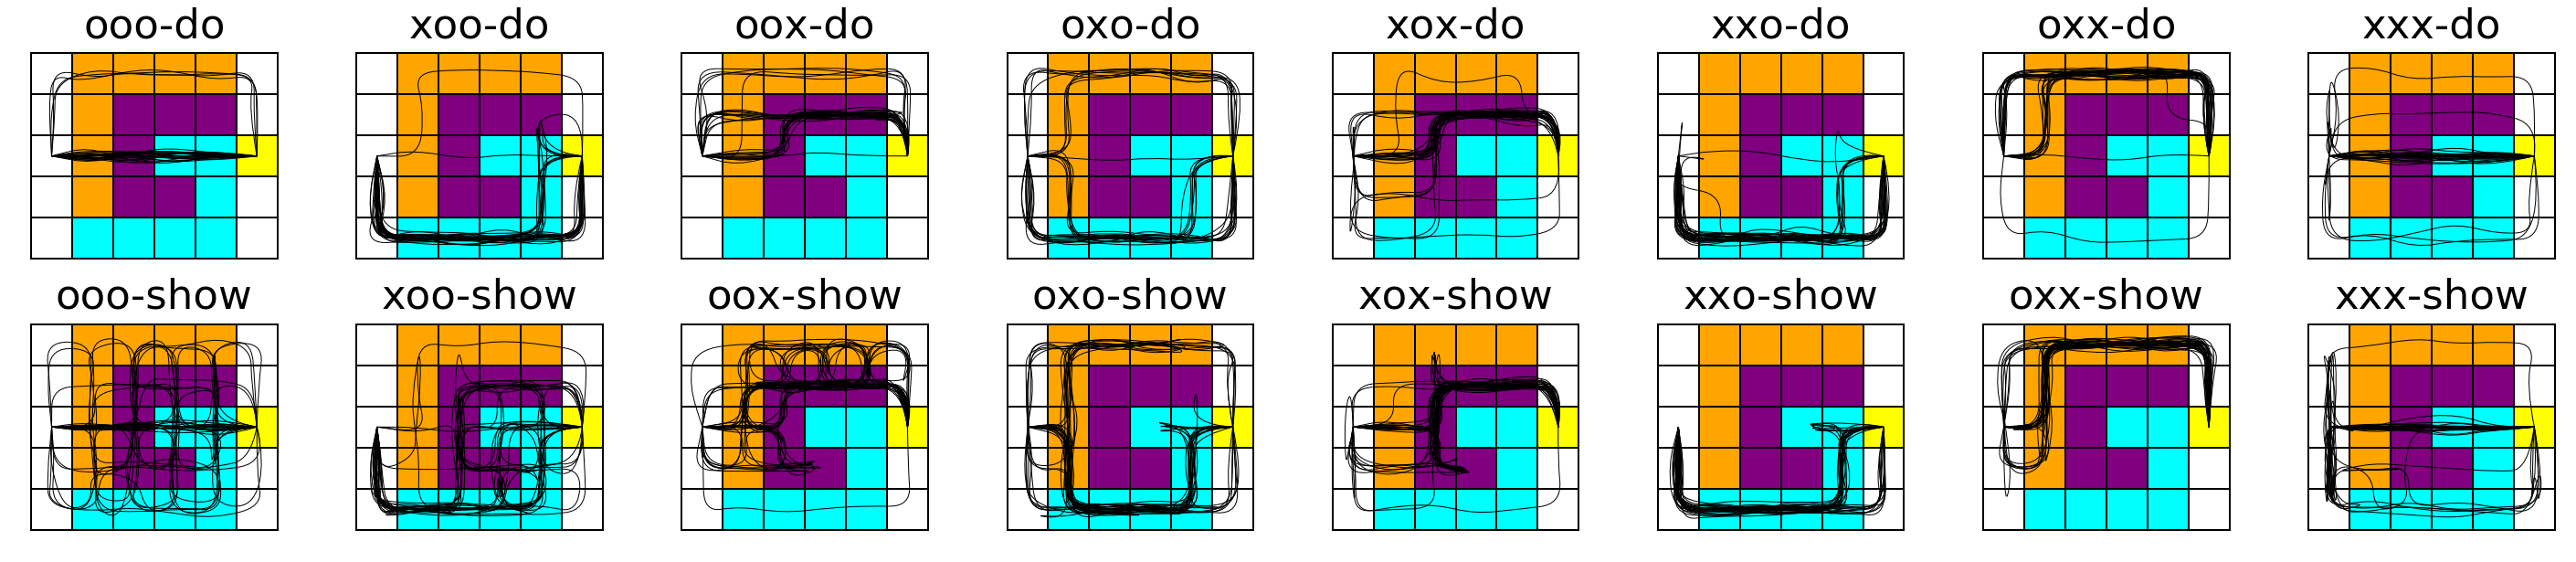

In [10]:
# Plot all participants
fig, axes = plt.subplots(2, 8, figsize=(50, 10))
gwps = {}
for x, rf in enumerate(rf_order):
    for y, cond in enumerate(cond_order):
        ax = axes[y][x]
        ax.set_title('%s-%s' % (rf, cond), fontsize=45)
        gwp = gw.plot(ax=ax, feature_colors=feature_colors)
        gwps[(rf, cond)] = gwp

for (rf, cond, p), ptrials in trials.groupby(['rf', 'cond', 'participant']):
    ptrials = ptrials.sort_values('timestep')
    traj = list(ptrials['stateaction']) + [((5, 2), 'x'), ]
    print(traj)
    gwp = gwps[(rf, cond)]
    visualize_trajectory(gwp, traj)
fig.savefig('./plots/all_participants.pdf')

In [14]:
# Plot individual participants
for (p, cond), ptrials in trials.groupby(['participant', 'cond']):
    fig, axes = plt.subplots(1, 8, figsize=(50, 8))
    fig.suptitle("%s (%s)" % (p, cond), fontsize=50)
    for i, (rf, ptrials) in enumerate(ptrials.groupby('rf')):
        ptrials = ptrials.sort_values('timestep')
        traj = list(ptrials['stateaction']) + [((5, 2), 'x'), ]
        gwp = gw.plot(ax=axes[i], feature_colors=feature_colors)
        visualize_trajectory(gwp, traj, lw=6, color='red', outline=True)
        axes[i].set_title(rf, fontsize=45)
    fig.savefig('./plots/%s-%s.pdf' % (cond, p))
    plt.close()

# Learning Study

In [3]:
responses = pd.read_pickle('data/learning-responses.pd.pkl')

In [5]:
teaching = pd.read_pickle('data/teaching-trials.pd.pkl')

In [6]:
print(teaching)

      participant  cond          phase  episode   rf  timestep  stateaction  \
20310         S28  show          learn        0  oox         0  ((0, 2), >)   
20314          S5    do          learn        0  xxo         0  ((0, 2), v)   
20316         S28  show          learn        0  oox         1  ((1, 2), ^)   
20317          S5    do          learn        0  xxo         1  ((0, 1), v)   
20318         S28  show          learn        0  oox         2  ((1, 3), ^)   
20321          S5    do          learn        0  xxo         2  ((0, 0), >)   
20322         S28  show          learn        0  oox         3  ((1, 4), >)   
20324         S28  show          learn        0  oox         4  ((2, 4), >)   
20326         S28  show          learn        0  oox         5  ((3, 4), >)   
20327          S5    do          learn        0  xxo         3  ((1, 0), >)   
20329         S28  show          learn        0  oox         6  ((4, 4), >)   
20331          S5    do          learn        0  xxo

(0.6, 0.85)

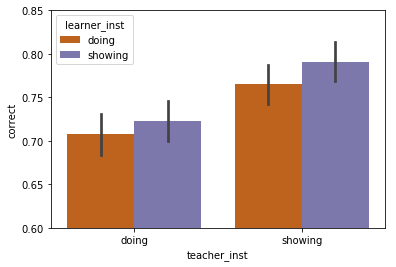

In [21]:
sns.barplot(data=responses, y='correct', x='teacher_inst', hue='learner_inst',
            order=['doing', 'showing'], hue_order=['doing', 'showing'],
            palette=sns.color_palette("Dark2")[1:])
plt.ylim(.6, .85)

(65, 85)

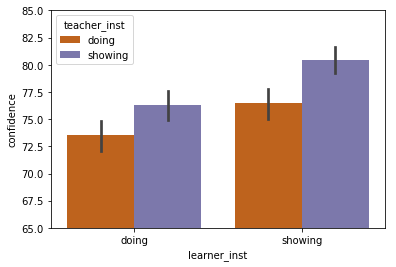

In [22]:
sns.barplot(data=responses, y='confidence', x='learner_inst', hue='teacher_inst',
            order=['doing', 'showing'], hue_order=['doing', 'showing'],
            palette=sns.color_palette("Dark2")[1:])
plt.ylim(65, 85)

# Both Studies

In [42]:
# Check that teacher IDs from the two studies match up
teacher_id_cond = trials.groupby('participant').\
    apply(lambda t: t.iloc[0]['cond']).reset_index()
teacher_id_cond['teacher_id'] = teacher_id_cond['participant'].\
    apply(lambda i: i.replace('S', ''))
teacher_id_cond['teacher_cond'] = teacher_id_cond[0]
teacher_id_cond = teacher_id_cond[['teacher_id', 'teacher_cond']]

learner_t_id_cond = responses.groupby('teacher_id').\
    apply(lambda t: t.iloc[0]['teacher_inst']).reset_index()
learner_t_id_cond['teacher_cond'] = learner_t_id_cond[0].apply(lambda c : c[:-3])
learner_t_id_cond['teacher_id'] = learner_t_id_cond['teacher_id'].\
    apply(lambda i: i.replace('s_', ''))
learner_t_id_cond = learner_t_id_cond[['teacher_id', 'teacher_cond']]

merged = learner_t_id_cond.merge(teacher_id_cond, on='teacher_id')

merged['teacher_cond_x'].equals(merged['teacher_cond_y'])

True